In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [88]:
from lv.dnn.dnnpipeline import DNNPipeline

In [89]:
ddp = DNNPipeline(top=100)

In [90]:
R0="B"

In [91]:
dnn = ddp.run_R0(R0, lr=0.01, dp=0.01,ep=1000,)

Layers: [100, 64, 32, 16, 3]
| EP 1000 |loss: 0.0166 | mean_: 0.0166 | val_l: 0.0097 | val_m: 0.0097 | lr: 0.0010 | 


In [94]:
ddp.dCT={}

In [95]:
ddp.dCT[R0] = ddp.get_contamination_R0(R0)

In [148]:
SN=10
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [149]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [150]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

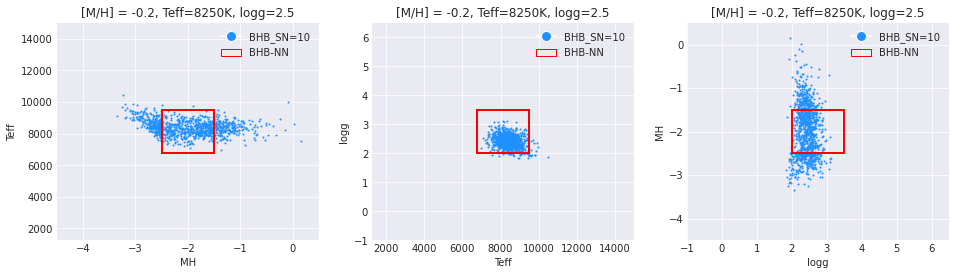

In [151]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

In [129]:
SN=100
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [130]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [131]:
p_pred

array([[-2.03895438e+00,  8.28323795e+03,  2.40518598e+00],
       [-1.96781856e+00,  8.23582782e+03,  2.49382615e+00],
       [-1.82410669e+00,  8.30950710e+03,  2.47091401e+00],
       ...,
       [-1.97906435e+00,  8.20973553e+03,  2.46400557e+00],
       [-2.01124737e+00,  8.18802921e+03,  2.47664459e+00],
       [-1.78430700e+00,  8.21739812e+03,  2.44394636e+00]])

In [132]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

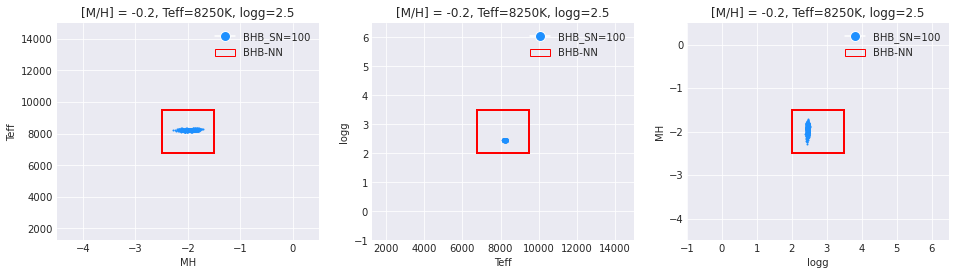

In [133]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

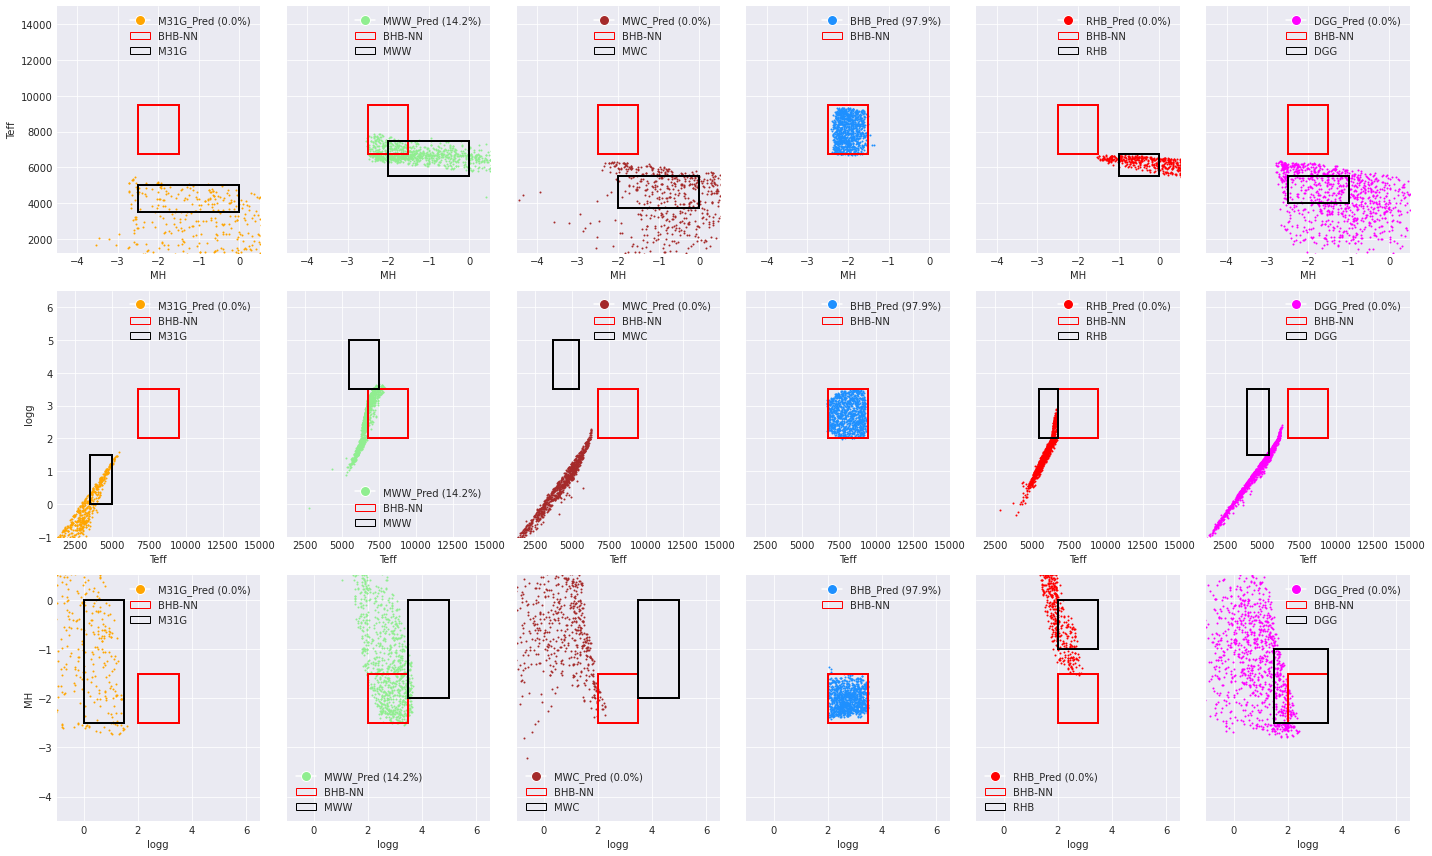

In [96]:
ddp.plot_box_R0("B")

AttributeError: 'DNNPipeline' object has no attribute 'np_preds'

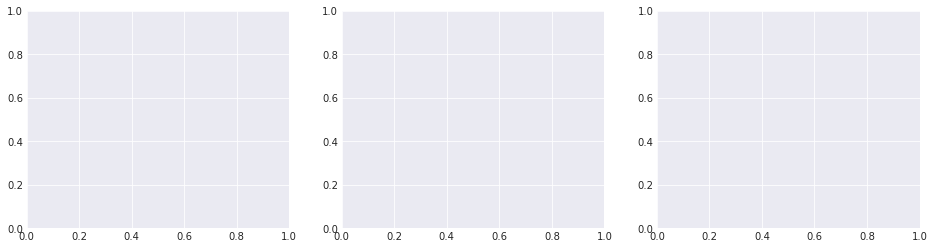

In [97]:
ddp.plot_nsbox_R0_R1("B","B")

In [56]:
p_pred

array([[3.80992594e+05, 1.78154582e+10, 2.61871297e+05],
       [3.64898906e+05, 1.77082440e+10, 3.47887836e+05],
       [3.64730688e+05, 1.79360512e+10, 2.45889242e+05],
       ...,
       [3.83831000e+05, 1.81117034e+10, 2.09458109e+05],
       [3.38923250e+05, 1.78046824e+10, 3.07363484e+05],
       [4.05608500e+05, 1.78026350e+10, 2.75623484e+05]])

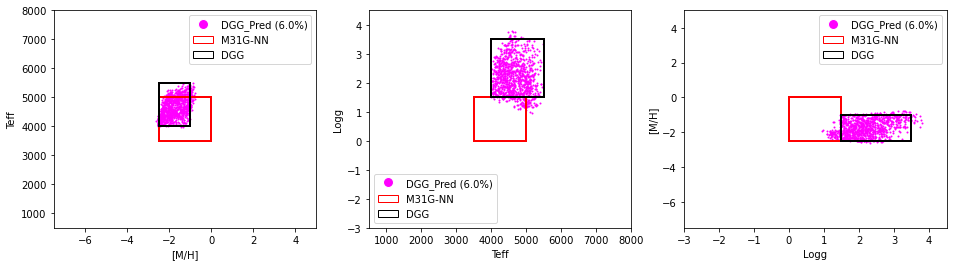

In [86]:
R0, R1 = "M", "G"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)

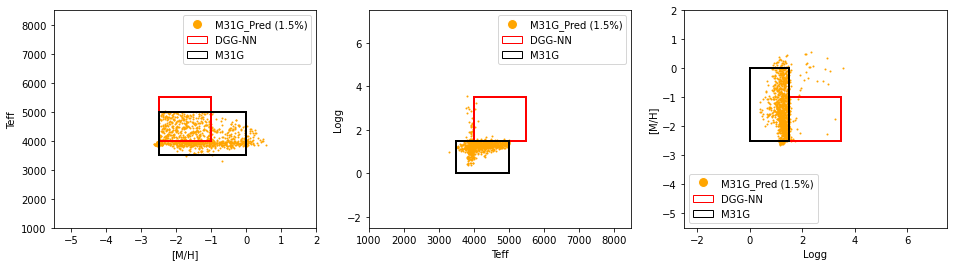

In [87]:
R0, R1 = "G", "M"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)

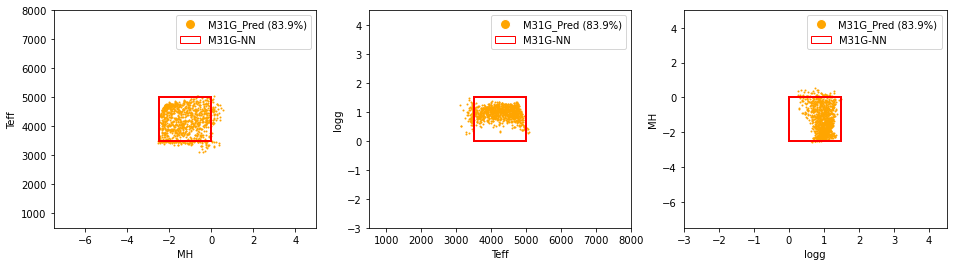

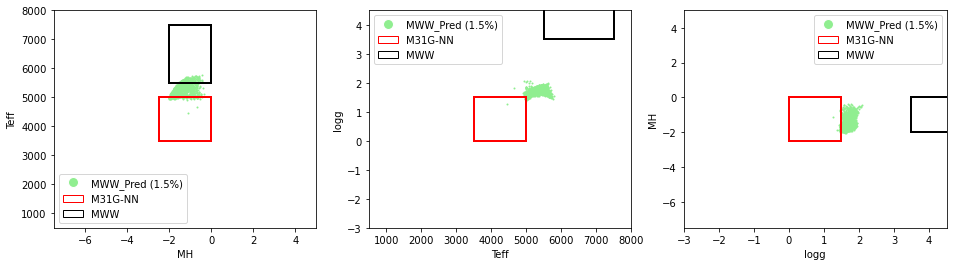

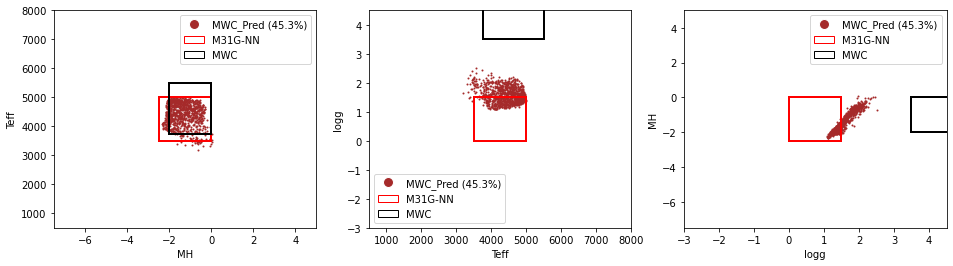

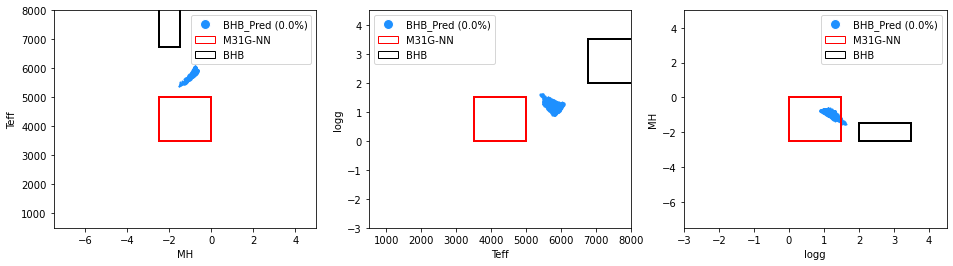

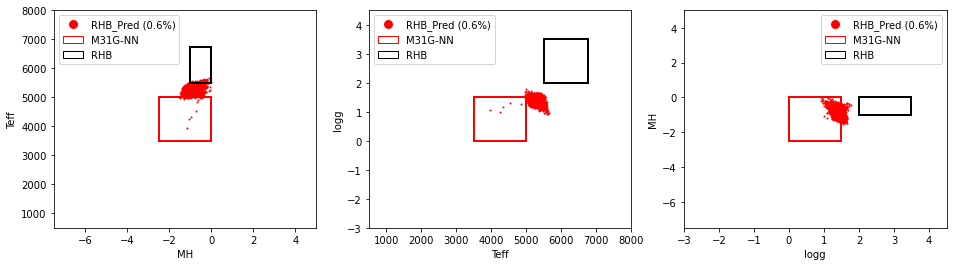

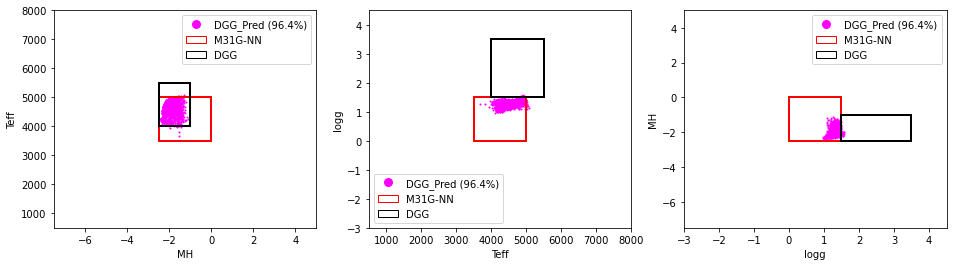

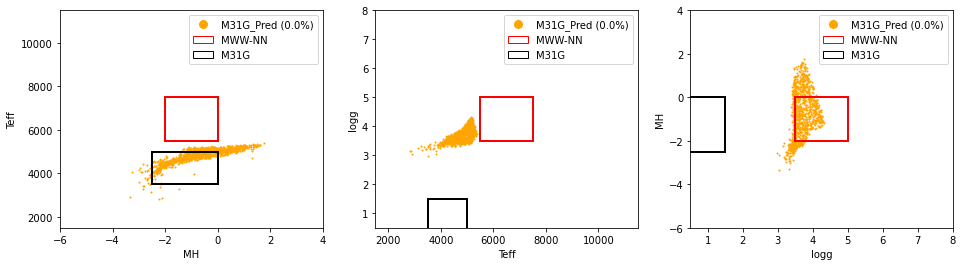

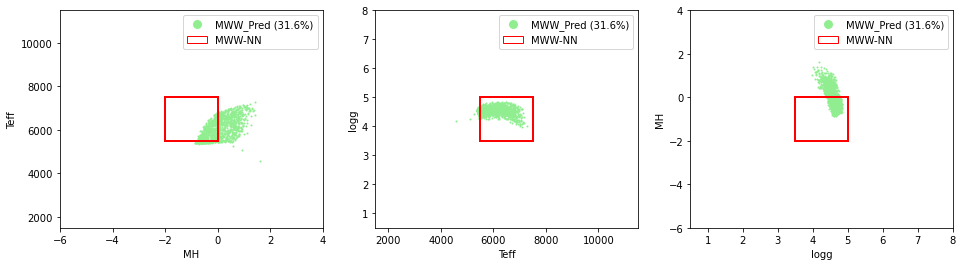

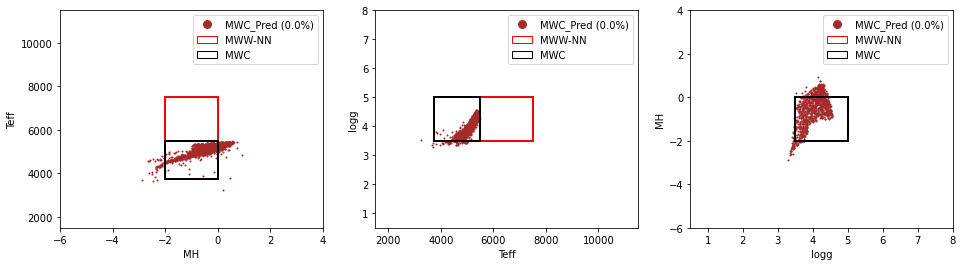

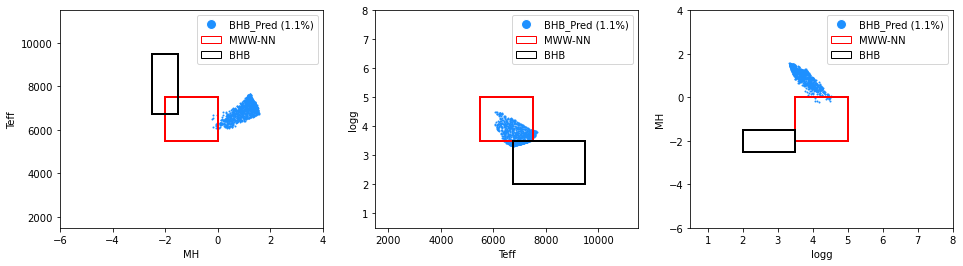

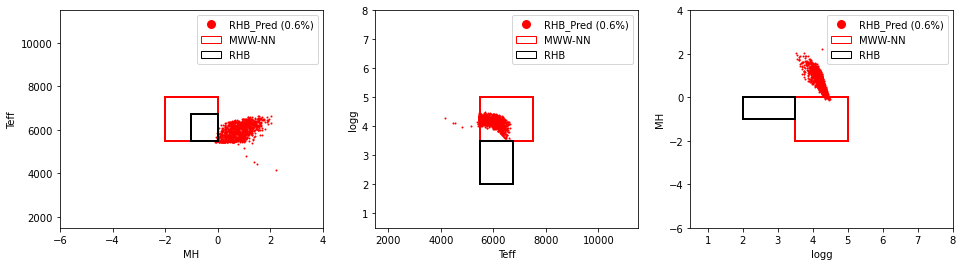

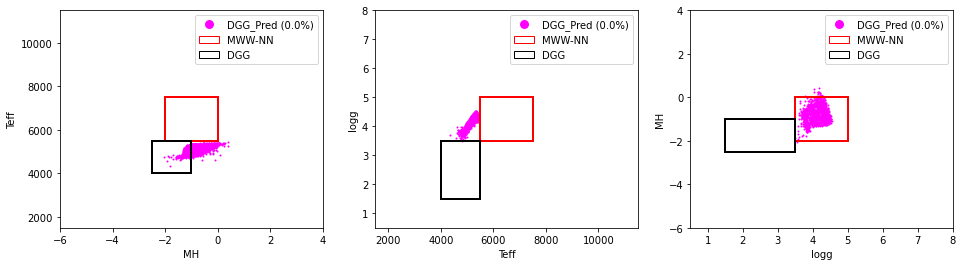

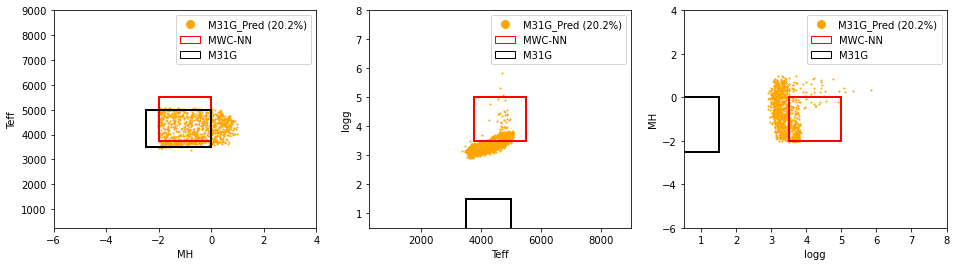

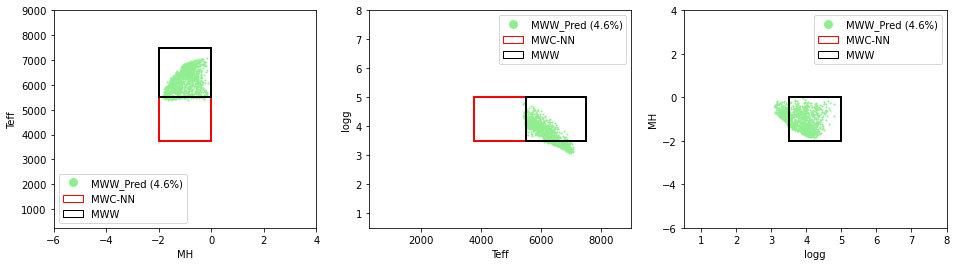

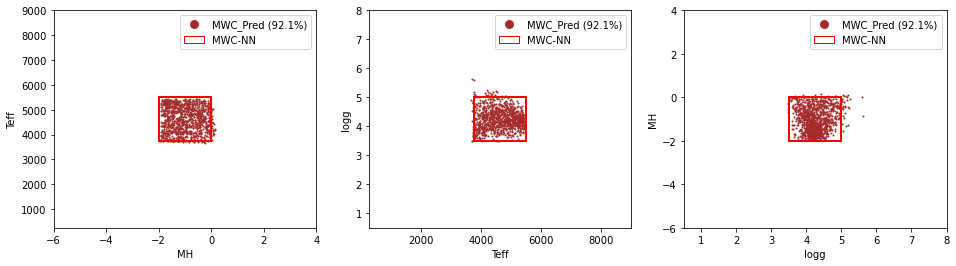

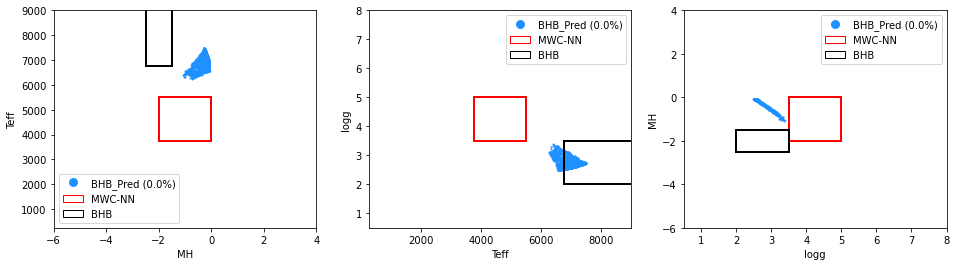

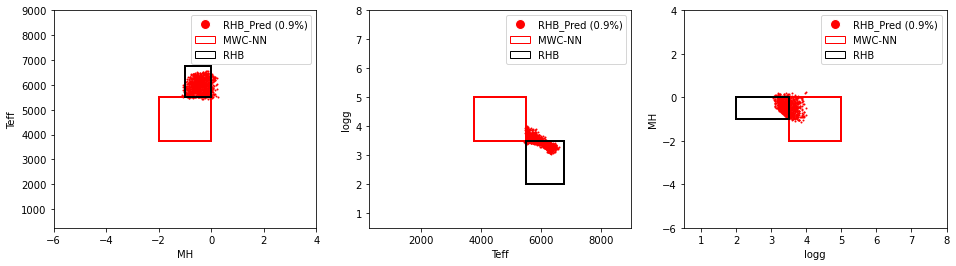

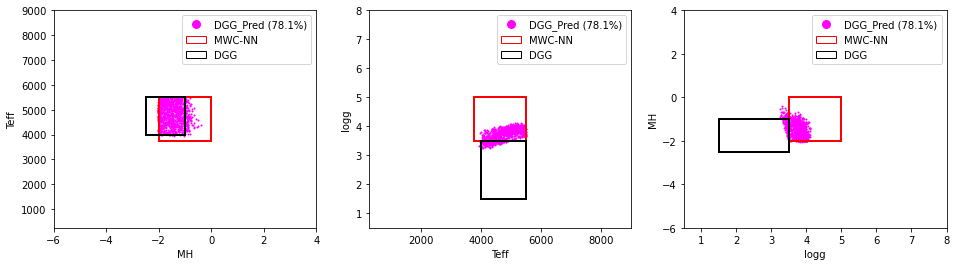

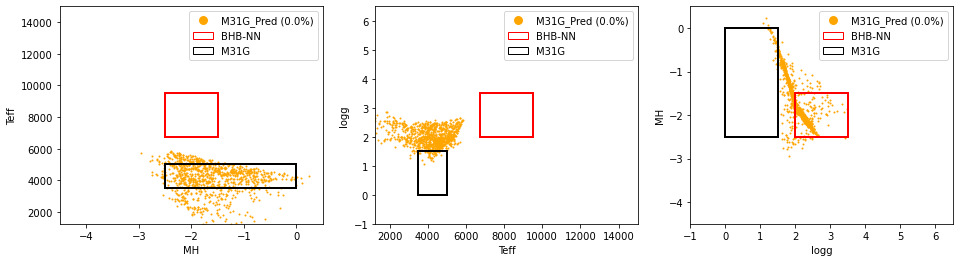

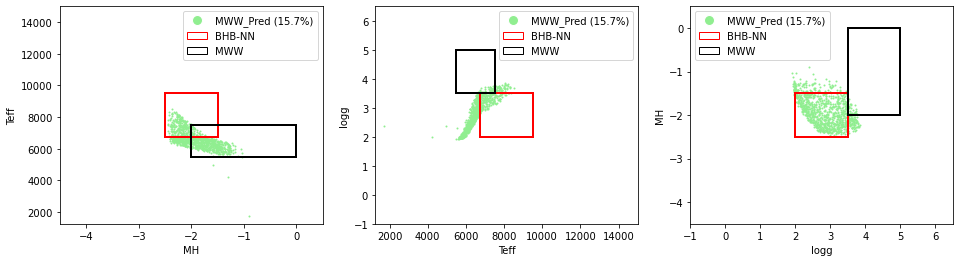

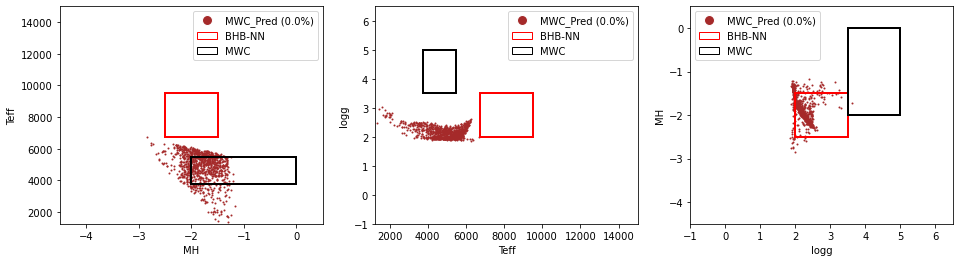

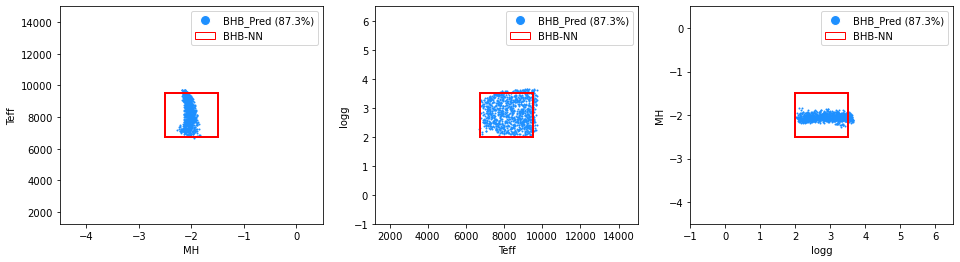

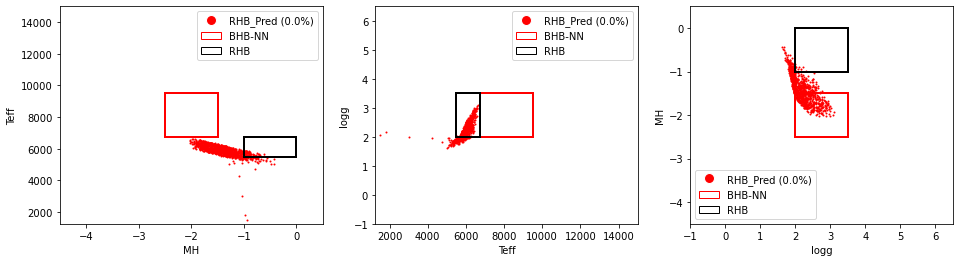

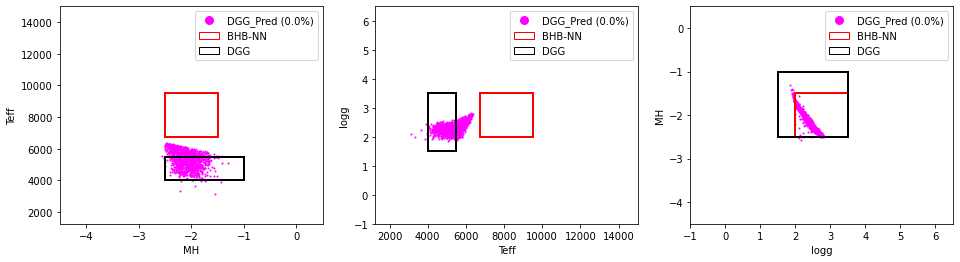

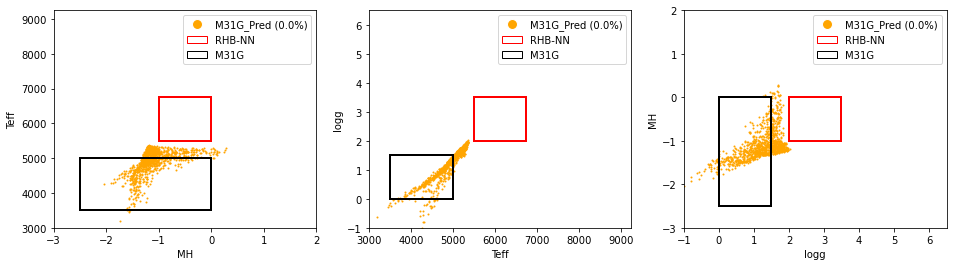

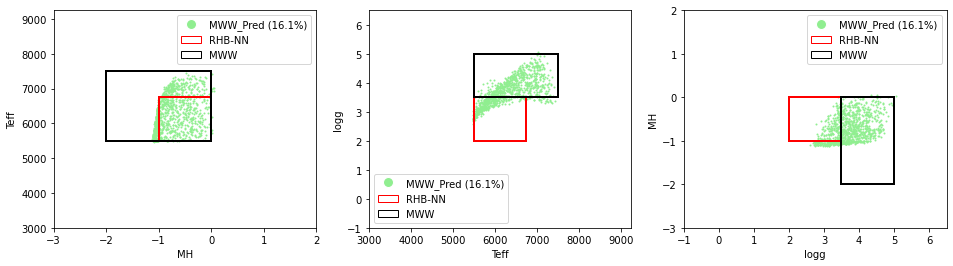

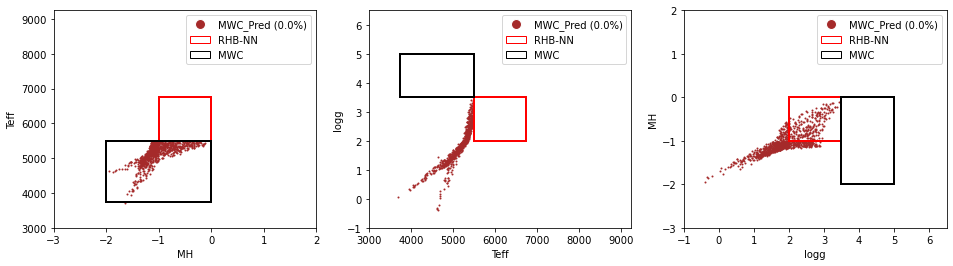

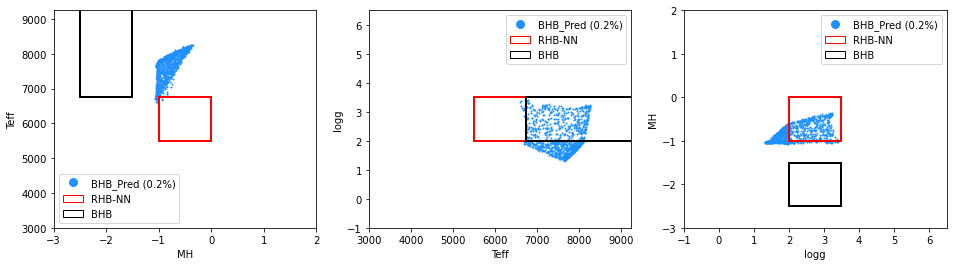

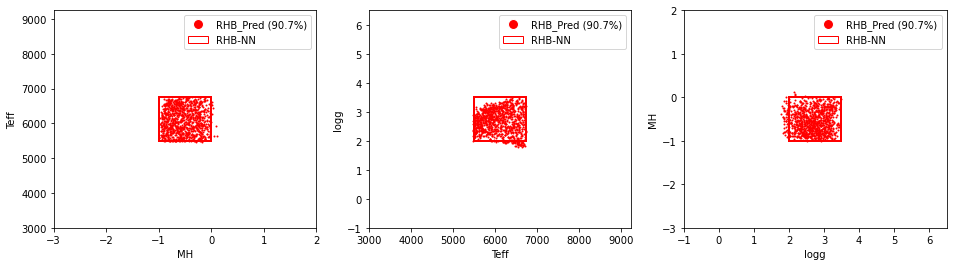

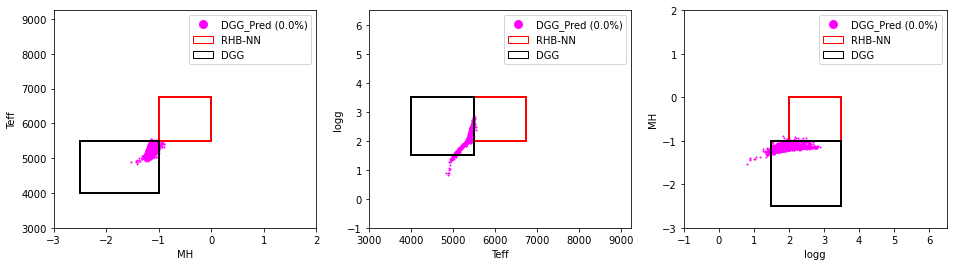

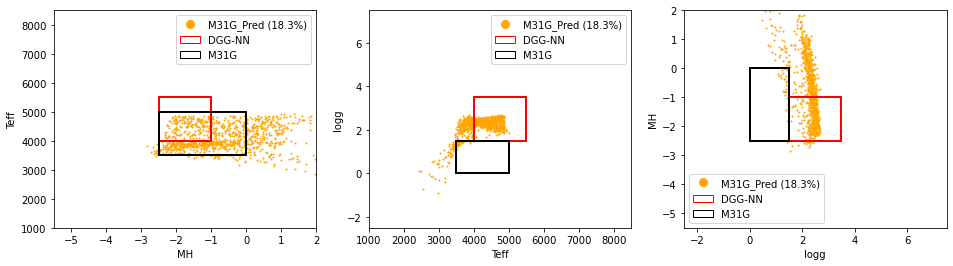

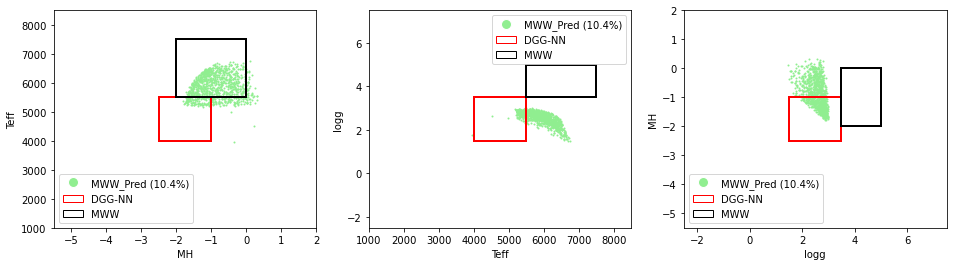

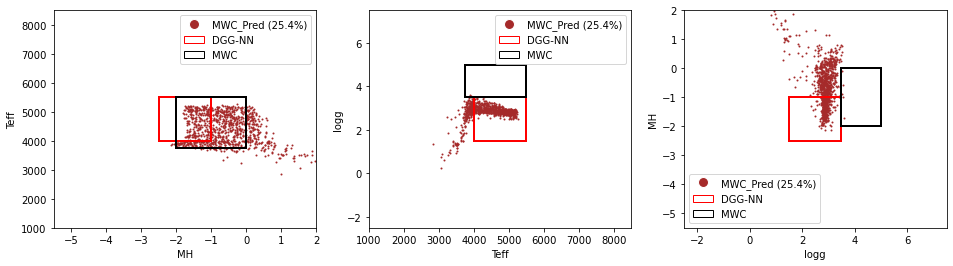

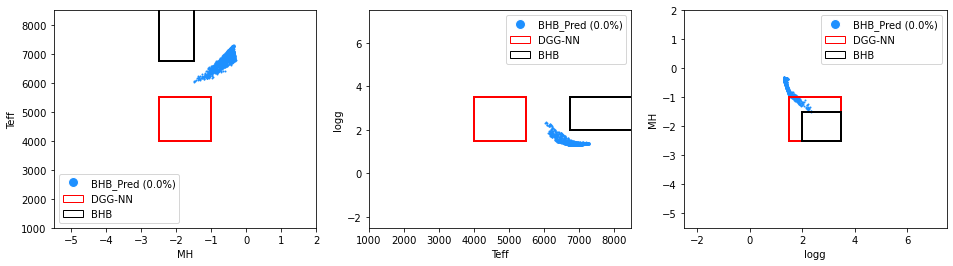

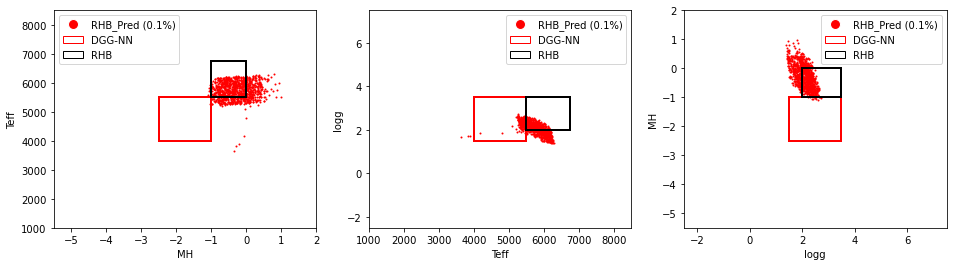

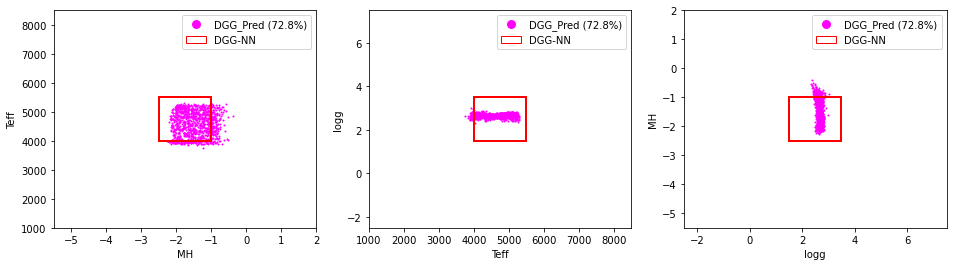

In [77]:
for R0 in ddp.Rnms:
    for R1 in ddp.Rnms:
        ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None) 

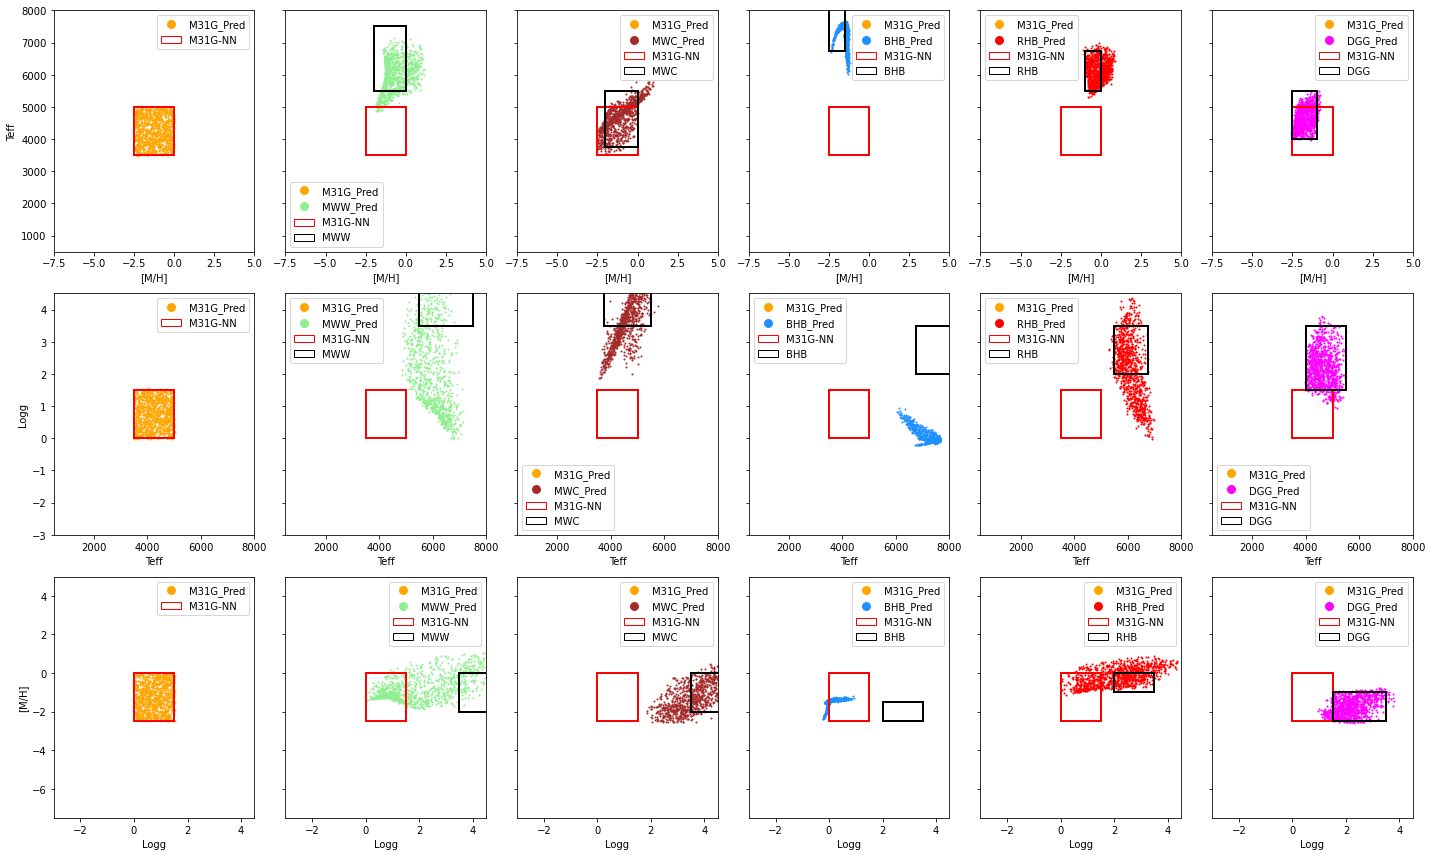

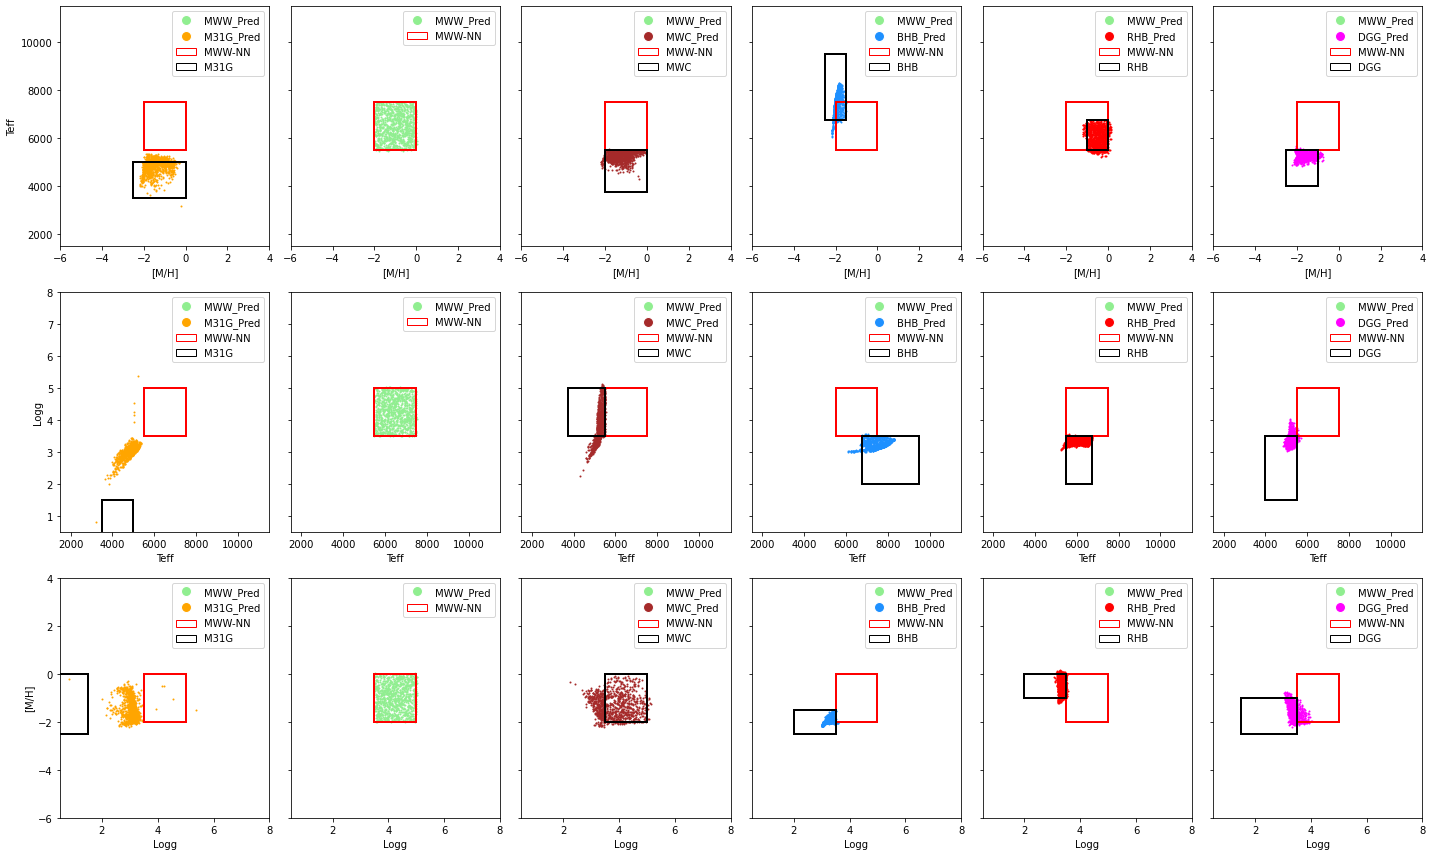

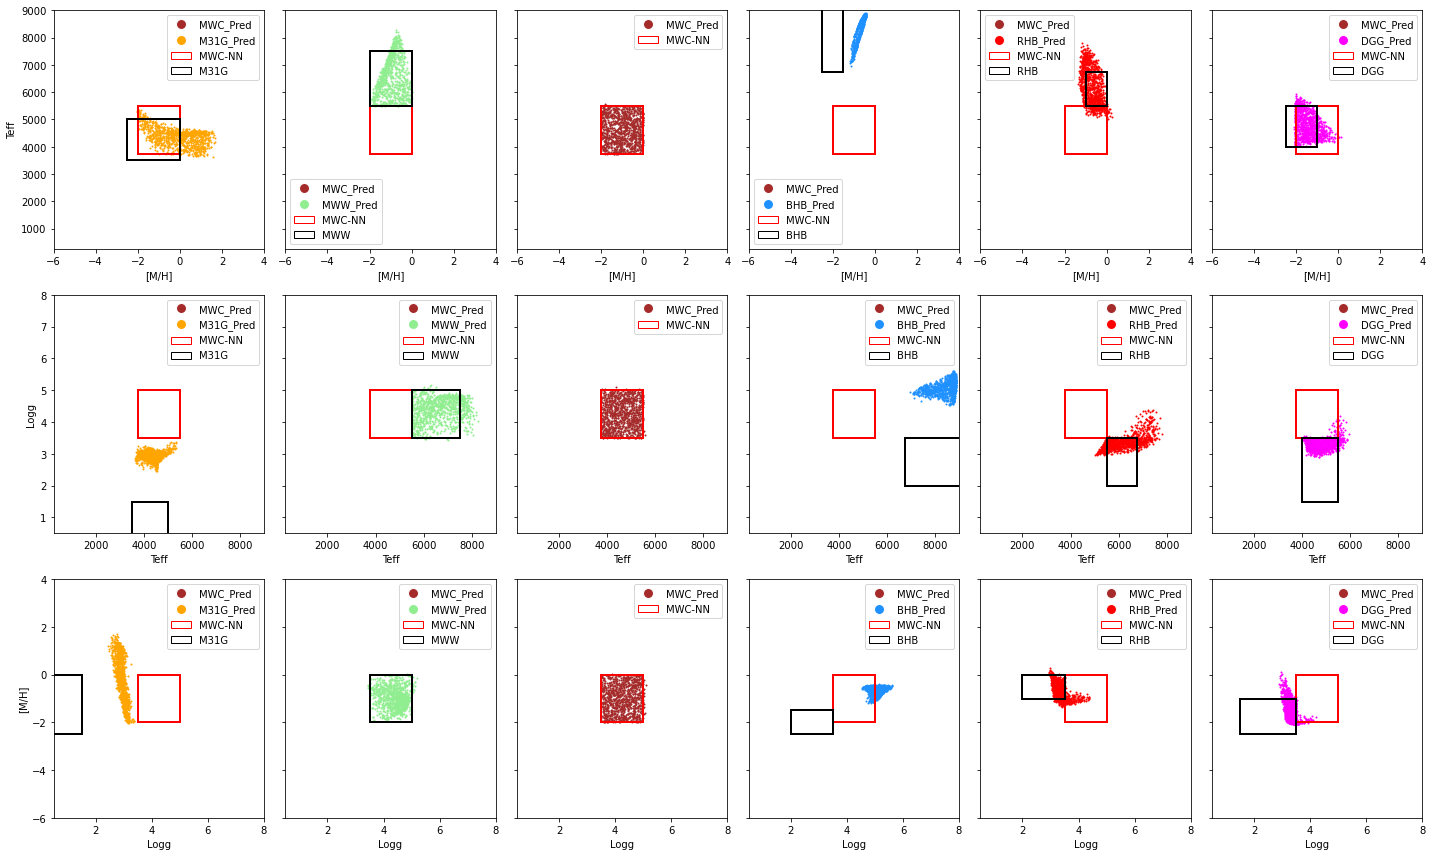

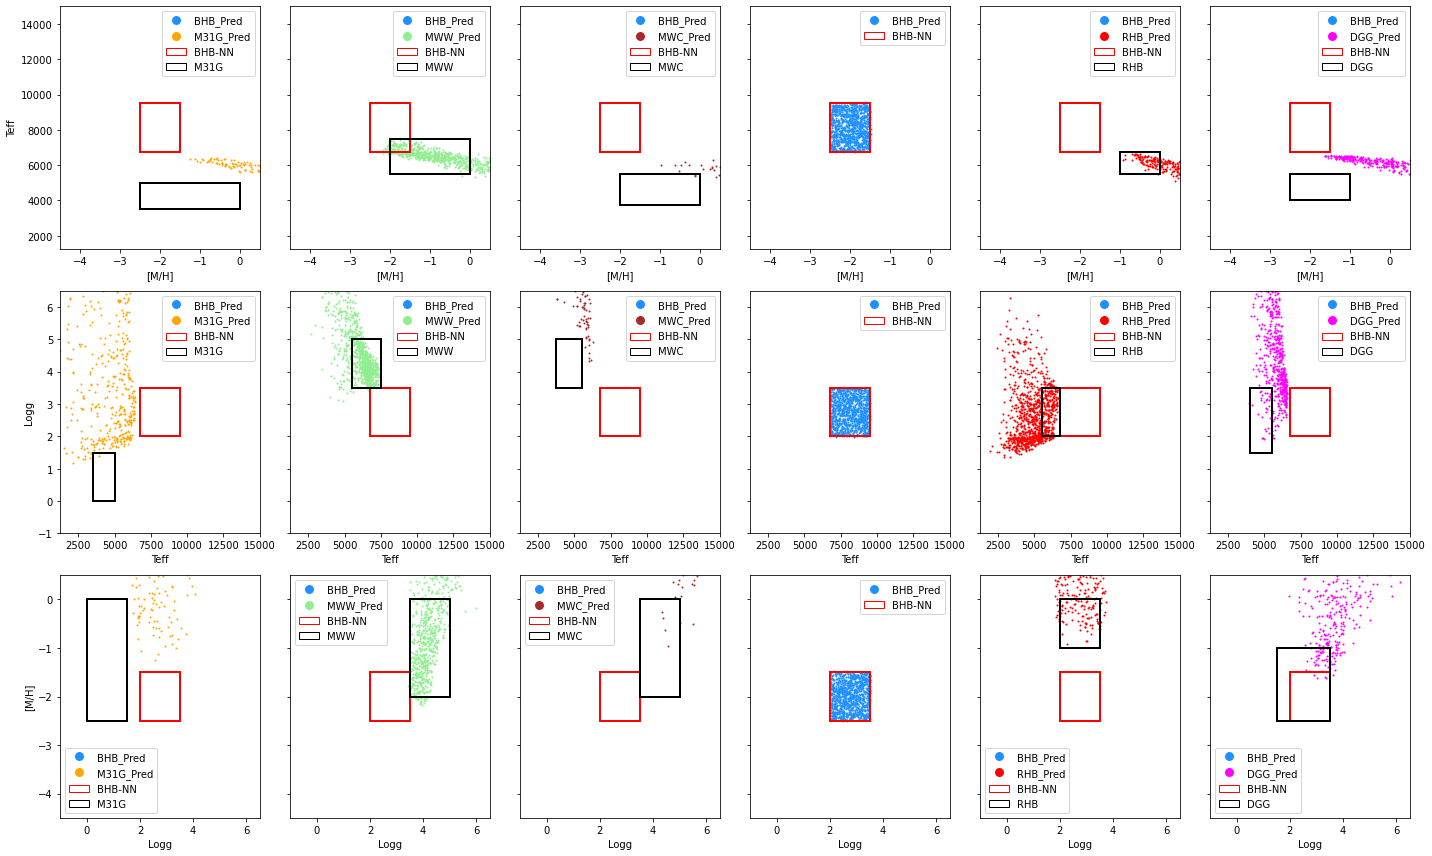

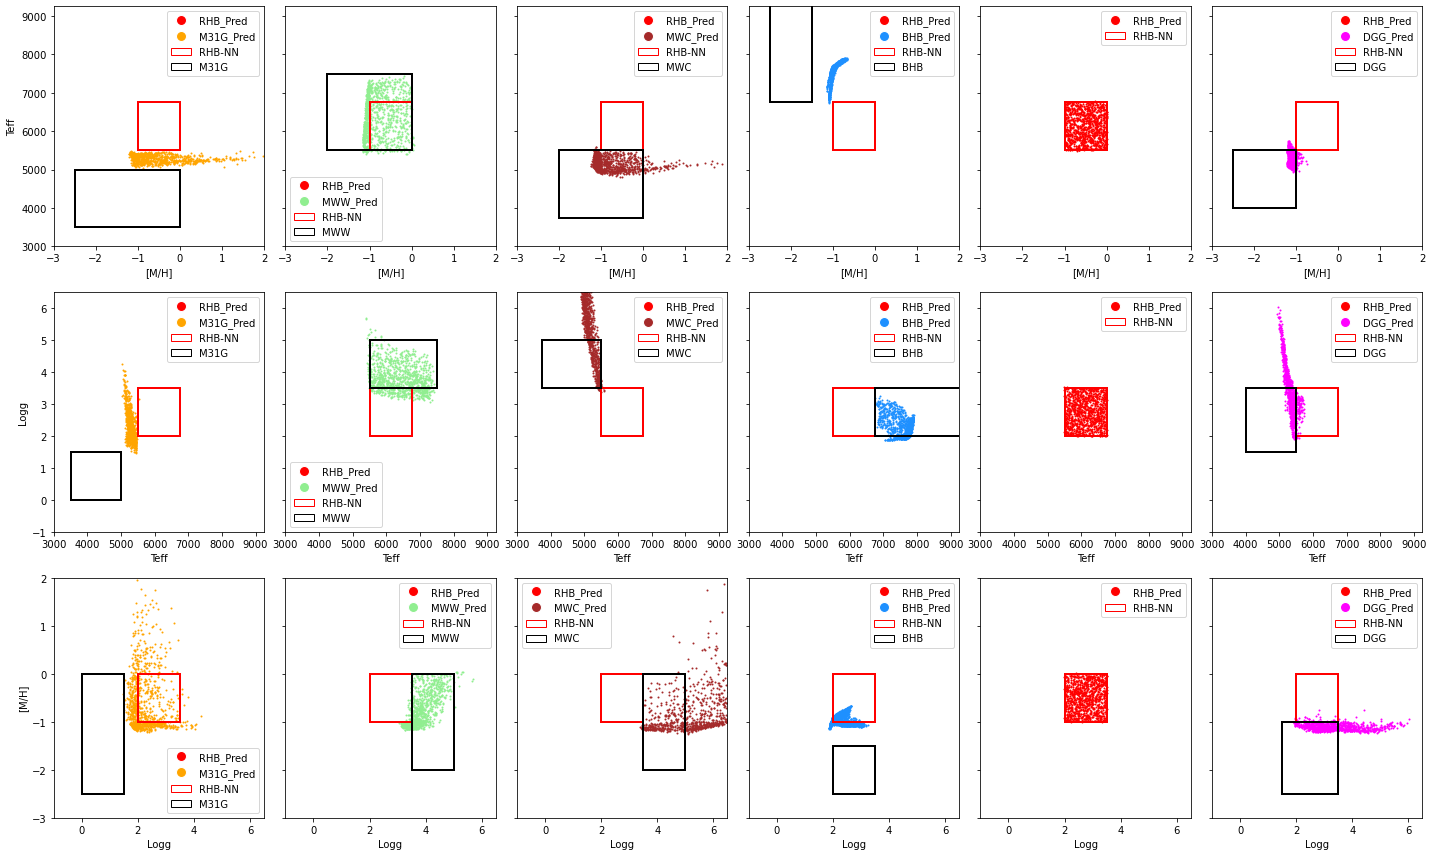

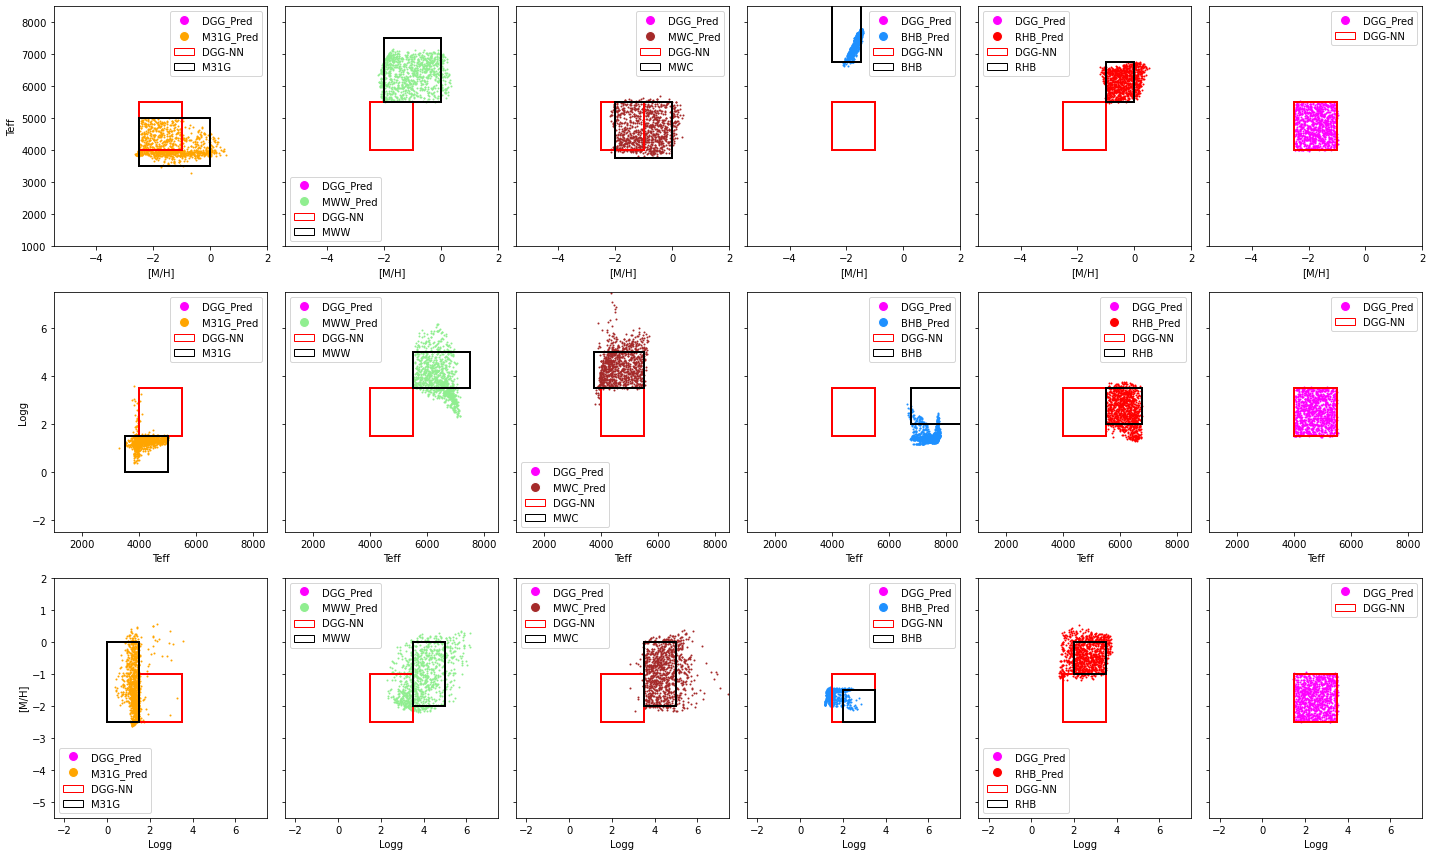

In [12]:
ddp.plot_box()

generate noise model for new box

dose snr work for R5000

take 1 model from region and add noise
error projection. snr = 10 * sqrt(2), Bosz_R5000, 30, 60

In [ ]:
sqrt(20)

snr at original /observed spec.

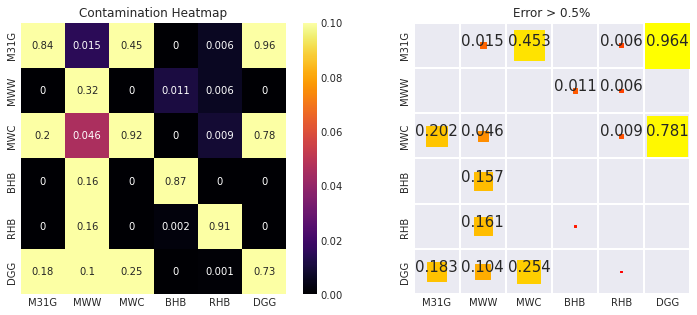

In [79]:
ddp.get_contamination_mat()

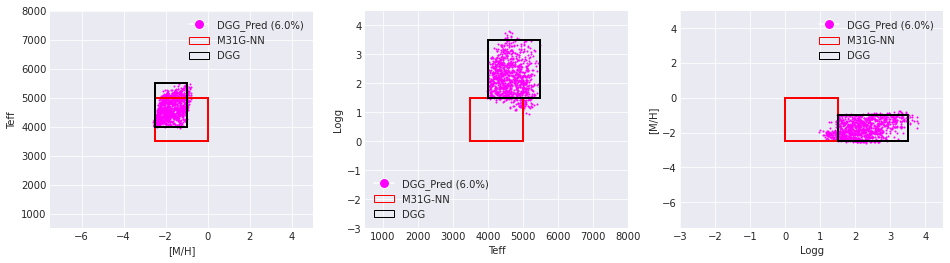

In [242]:
R0, R1 = "M", "G"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)